## Telecommunication Customer Churn

### Buisness Objective:- 
The main goal of our project is to develop an understanding of the cause of customer churn which assists telecom operators to predict customers who are most likely subject to churn, and what to do to retain the most valuable customer.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv("c:/users/onkar/downloads/telecommunications_churn.csv", sep= ';')

In [3]:
df1.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [4]:
df1.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [5]:
df1.shape

(3333, 19)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [7]:
df1.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [8]:
len(df1[df1.duplicated()])

0

In [9]:
print(df1.churn.value_counts())

0    2850
1     483
Name: churn, dtype: int64


In [10]:
import seaborn as sns

<AxesSubplot:xlabel='churn', ylabel='count'>

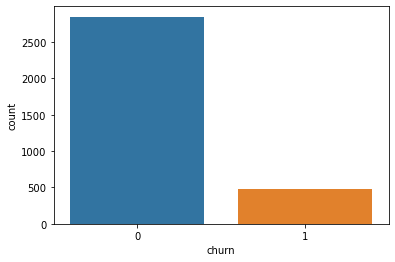

In [11]:
sns.countplot(x=df1.churn)

### (1-Churn, 0-No Churn)

# PIE-PLOT

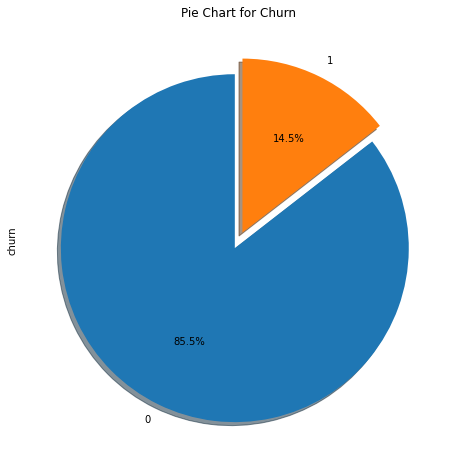

In [12]:
df1 ['churn'].value_counts().plot.pie(startangle=90,autopct='%1.1f%%',explode=[0.05,0.05],figsize=(8,8),shadow=True)
plt.title('Pie Chart for Churn')
plt.show()

# correlation matrix/heatmap

<AxesSubplot:>

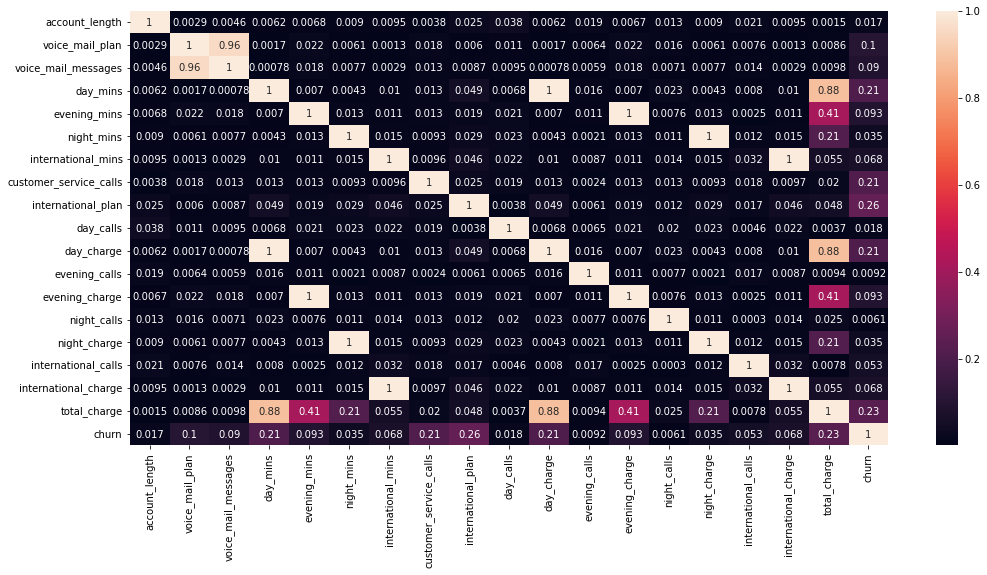

In [13]:
plt.figure(figsize=(17,8))
correlation=df1.corr()
sns.heatmap(abs(correlation), annot=True)

In [14]:
X=df1.drop('churn',axis=1)
Y=df1.churn

In [15]:
X.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09


In [16]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
train_scaler=StandardScaler()

In [21]:
test_scaler=StandardScaler()

In [22]:
x_train=train_scaler.fit_transform(x_train)

In [23]:
x_test=test_scaler.fit_transform(x_test)

In [24]:
x_train

array([[-1.0660133 , -0.62477648, -0.59736525, ..., -1.81801012,
        -3.66027184,  0.0864811 ],
       [-1.24079432,  1.60057242,  0.28158769, ...,  1.01824545,
         0.72344491, -0.70476974],
       [-0.34192052, -0.62477648, -0.59736525, ..., -0.19729265,
         2.25510498,  0.05323527],
       ...,
       [-0.19210822, -0.62477648, -0.59736525, ..., -1.00765139,
         0.30091799, -0.80925665],
       [-0.24204565, -0.62477648, -0.59736525, ..., -0.60247202,
        -0.13481289, -0.02940437],
       [ 0.73173431, -0.62477648, -0.59736525, ..., -1.00765139,
         2.3607367 ,  1.74592315]])

In [25]:
x_test

array([[-0.25298586, -0.60353664, -0.57884072, ...,  0.22014162,
        -0.31830791,  1.03691815],
       [ 0.25655263,  1.65690022,  2.03673176, ..., -0.59822872,
        -0.06316742, -1.51710048],
       [-0.83895513, -0.60353664, -0.57884072, ..., -0.18904355,
         0.84996699,  0.71491054],
       ...,
       [-0.17655509, -0.60353664, -0.57884072, ..., -1.00741389,
        -0.17059499,  0.54815661],
       [-1.3230167 ,  1.65690022,  1.16487427, ..., -0.18904355,
         0.15168774,  1.79593607],
       [-0.91538591,  1.65690022,  1.52814823, ..., -1.41659906,
        -0.78830356,  1.36275917]])

In [26]:
#featute selection

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2   

In [28]:
ordered_rank_features=SelectKBest(score_func=chi2,k=18)
ordered_features=ordered_rank_features.fit(X,Y)    

In [29]:
ordered_features.scores_

array([1.43041969e+01, 2.51569590e+01, 6.20628799e+02, 2.31416931e+03,
       3.67164781e+02, 5.34465062e+01, 1.18130812e+01, 1.60773588e+02,
       2.03244178e+02, 4.55305859e+00, 3.93399658e+02, 1.12615986e+00,
       3.12019307e+01, 4.80689125e-01, 2.40554205e+00, 1.25827693e+01,
       3.19059341e+00, 3.31440144e+02])

In [30]:
dfscores=pd.DataFrame(ordered_features.scores_,columns=['scores'])
dfcolumns=pd.DataFrame(X.columns)

In [31]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [32]:
features_rank.columns=['features','scores']

In [33]:
features_rank.nlargest(10,'scores')

,features,scores
3,day_mins,2314.169315
2,voice_mail_messages,620.628799
10,day_charge,393.399658
4,evening_mins,367.164781
17,total_charge,331.440144
8,international_plan,203.244178
7,customer_service_calls,160.773588
5,night_mins,53.446506
12,evening_charge,31.201931
1,voice_mail_plan,25.156959


In [34]:
import seaborn as sns

In [35]:
corr=df1.iloc[:,:-1].corr()
top_features=corr.index

<AxesSubplot:>

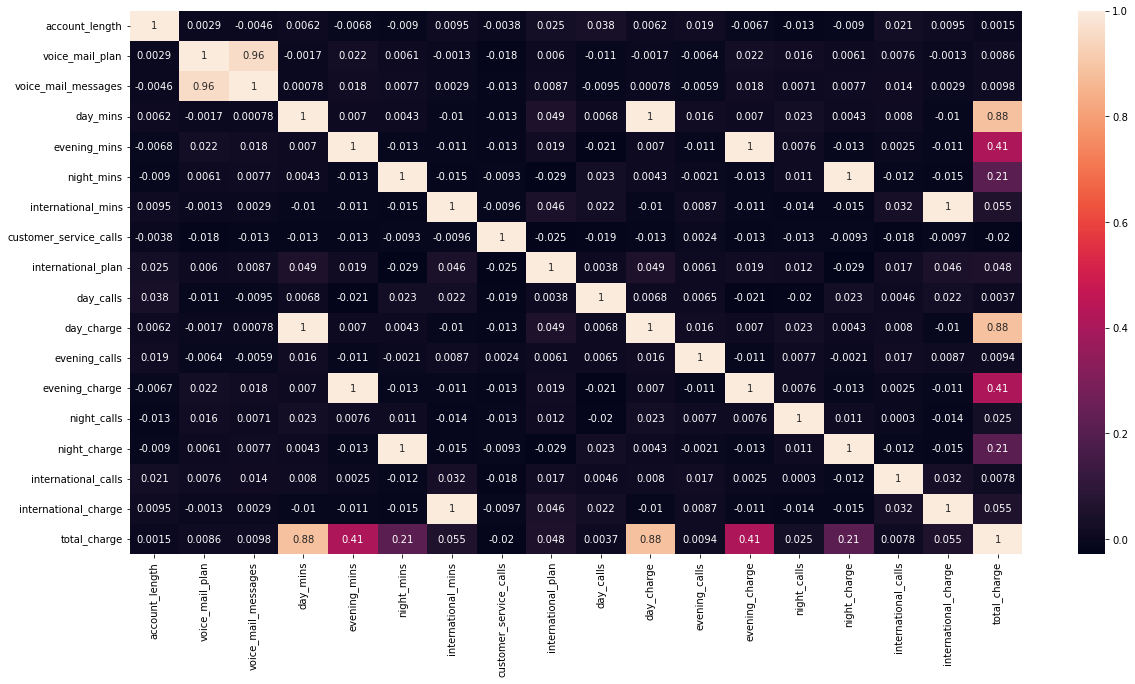

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(df1[top_features].corr(),annot=True)

In [37]:
threshold=0.9

In [38]:
def corr(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]#getting the name of column
                col_corr.add(colname)
    return col_corr

In [39]:
corr_featues=corr(df1,threshold)
corr_featues

{'day_charge',
 'evening_charge',
 'international_charge',
 'night_charge',
 'voice_mail_messages'}

In [40]:
new_df=df1.drop(corr_featues,axis=1)

In [41]:
new_df.head()

,account_length,voice_mail_plan,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,evening_calls,night_calls,international_calls,total_charge,churn
0,128,1,265.1,197.4,244.7,10.0,1,0,110,99,91,3,75.56,0
1,107,1,161.6,195.5,254.4,13.7,1,0,123,103,103,3,59.24,0
2,137,0,243.4,121.2,162.6,12.2,0,0,114,110,104,5,62.29,0
3,84,0,299.4,61.9,196.9,6.6,2,1,71,88,89,7,66.80,0
4,75,0,166.7,148.3,186.9,10.1,3,1,113,122,121,3,52.09,0


In [42]:
new_df.columns

Index(['account_length', 'voice_mail_plan', 'day_mins', 'evening_mins',
       'night_mins', 'international_mins', 'customer_service_calls',
       'international_plan', 'day_calls', 'evening_calls', 'night_calls',
       'international_calls', 'total_charge', 'churn'],
      dtype='object')

## balancing -oversampling

In [43]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [44]:
Counter(y_train)

Counter({0: 1988, 1: 345})

In [45]:
OS=RandomOverSampler(0.5)

C:\Users\onkar\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [46]:
x_train_ns,y_train_ns=OS.fit_resample(x_train,y_train)
print('the number of classes before fit{}'.format(Counter(y_train)))
print('the number of classes after fit{}'.format(Counter(y_train_ns)))

the number of classes before fitCounter({0: 1988, 1: 345})
the number of classes after fitCounter({0: 1988, 1: 994})


### model build

# 1. RandomForest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
RF= RandomForestClassifier()
RF.fit(x_train_ns,y_train_ns)
y_pred_test_RF=RF.predict(x_test)
y_pred_train_RF=RF.predict(x_train_ns)

In [50]:
# accuracy score
accuracy_train_RF=accuracy_score(y_train_ns,y_pred_train_RF)*100
accuracy_test_RF= accuracy_score(y_test, y_pred_test_RF) * 100
print('Accuracy of Training data =',accuracy_train_RF)
print("Accuracy of Test data =", accuracy_test_RF)

Accuracy of Training data = 100.0
Accuracy of Test data = 97.5


In [51]:
print(classification_report(y_test, y_pred_test_RF))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       862
           1       0.96      0.86      0.90       138

    accuracy                           0.97      1000
   macro avg       0.97      0.92      0.94      1000
weighted avg       0.97      0.97      0.97      1000



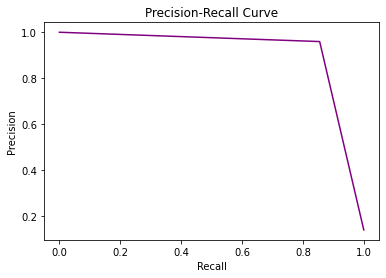

In [112]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_RF)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

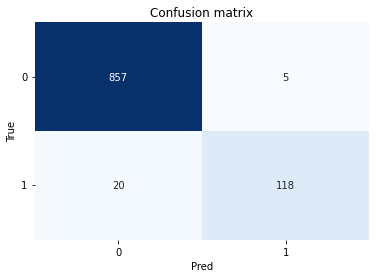

In [52]:
from sklearn import metrics
classes = np.unique(y_test)
cm0 = metrics.confusion_matrix(y_test, y_pred_test_RF)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [53]:
# finding mean square error
from sklearn.metrics import mean_squared_error
MSE1=mean_squared_error(y_test,y_pred_test_RF)
RF_RMSE=np.sqrt(MSE1)
RF_RMSE

0.15811388300841897

# 2.Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [56]:
DS = DecisionTreeClassifier()
DS.fit(x_train_ns,y_train_ns)
y_pred_test_DS=DS.predict(x_test)
y_pred_train_DS=DS.predict(x_train_ns)

In [57]:
# accuracy score
accuracy_train_DS=accuracy_score(y_train_ns,y_pred_train_DS)*100
accuracy_test_DS= accuracy_score(y_test, y_pred_test_DS) * 100
print('Accuracy of Training data =',accuracy_train_DS)
print("Accuracy of Test data =", accuracy_test_DS)

Accuracy of Training data = 100.0
Accuracy of Test data = 95.19999999999999


In [58]:
print(classification_report(y_test, y_pred_test_DS))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       862
           1       0.81      0.85      0.83       138

    accuracy                           0.95      1000
   macro avg       0.89      0.91      0.90      1000
weighted avg       0.95      0.95      0.95      1000



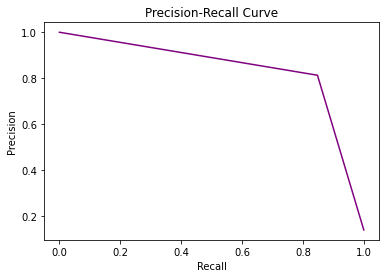

In [113]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_DS)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

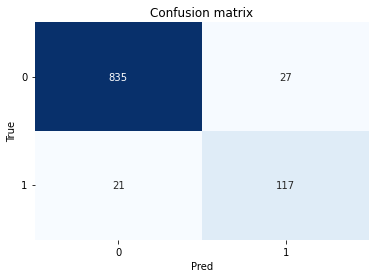

In [59]:
from sklearn import metrics
classes = np.unique(y_test)
cm0 = metrics.confusion_matrix(y_test, y_pred_test_DS)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [60]:
# finding mean square error
from sklearn.metrics import mean_squared_error
MSE2=mean_squared_error(y_test,y_pred_test_DS)
DS_RMSE=np.sqrt(MSE2)
DS_RMSE

0.21908902300206645

# 3.LogisticRegression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [63]:
LR= LogisticRegression()
LR.fit(x_train_ns,y_train_ns)
y_pred_test_LR=LR.predict(x_test)
y_pred_train_LR=LR.predict(x_train_ns)

In [64]:
# accuracy score
accuracy_train_LR=accuracy_score(y_train_ns,y_pred_train_LR)*100
accuracy_test_LR= accuracy_score(y_test, y_pred_test_LR) * 100
print('Accuracy of Training data =',accuracy_train_LR)
print("Accuracy of Test data =", accuracy_test_LR)

Accuracy of Training data = 77.76659959758551
Accuracy of Test data = 81.39999999999999


In [65]:
print(classification_report(y_test, y_pred_test_LR))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       862
           1       0.36      0.46      0.40       138

    accuracy                           0.81      1000
   macro avg       0.64      0.66      0.65      1000
weighted avg       0.83      0.81      0.82      1000



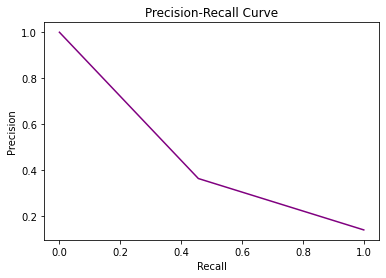

In [114]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_LR)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

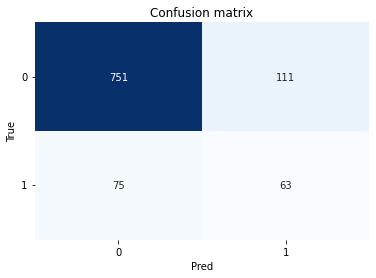

In [66]:
from sklearn import metrics
classes = np.unique(y_test)
cm0 = metrics.confusion_matrix(y_test, y_pred_test_LR)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [67]:
# finding mean square error
from sklearn.metrics import mean_squared_error
MSE3=mean_squared_error(y_test,y_pred_test_LR)
LR_RMSE=np.sqrt(MSE3)
LR_RMSE

0.4312771730569565

# 4. Support Vector Machines

In [68]:
from sklearn.svm import LinearSVC

In [69]:
SVM= LinearSVC()
SVM.fit(x_train_ns,y_train_ns)
y_pred_test_SVM=SVM.predict(x_test)
y_pred_train_SVM=SVM.predict(x_train_ns)

C:\Users\onkar\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [70]:
# accuracy score
accuracy_train_SVM=accuracy_score(y_train_ns,y_pred_train_SVM)*100
accuracy_test_SVM= accuracy_score(y_test, y_pred_test_SVM) * 100
print('Accuracy of Training data =',accuracy_train_SVM)
print("Accuracy of Test data =", accuracy_test_SVM)

Accuracy of Training data = 77.46478873239437
Accuracy of Test data = 81.2


In [71]:
print(classification_report(y_test, y_pred_test_SVM))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       862
           1       0.35      0.44      0.39       138

    accuracy                           0.81      1000
   macro avg       0.63      0.66      0.64      1000
weighted avg       0.83      0.81      0.82      1000



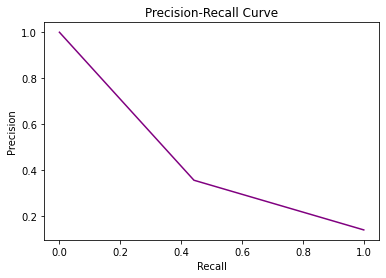

In [115]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_SVM)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

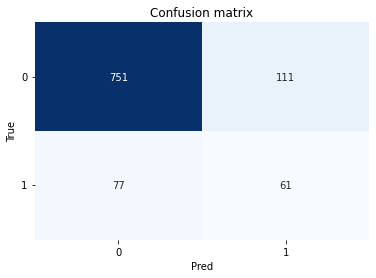

In [72]:
from sklearn import metrics
classes = np.unique(y_test)
cm0 = metrics.confusion_matrix(y_test, y_pred_test_SVM)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [73]:
# finding mean square error
from sklearn.metrics import mean_squared_error
MSE4=mean_squared_error(y_test,y_pred_test_SVM)
SVM_RMSE=np.sqrt(MSE4)
SVM_RMSE

0.433589667773576

# 5.AdaBoostClassifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
ADA= AdaBoostClassifier()
ADA.fit(x_train_ns,y_train_ns)
y_pred_test_ADA=ADA.predict(x_test)
y_pred_train_ADA=ADA.predict(x_train_ns)

In [76]:
# accuracy score
accuracy_train_ADA=accuracy_score(y_train_ns,y_pred_train_ADA)*100
accuracy_test_ADA= accuracy_score(y_test, y_pred_test_ADA) * 100
print('Accuracy of Training data =',accuracy_train_ADA)
print("Accuracy of Test data =", accuracy_test_ADA)

Accuracy of Training data = 90.61032863849765
Accuracy of Test data = 89.2


In [77]:
print(classification_report(y_test, y_pred_test_ADA))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       862
           1       0.59      0.72      0.65       138

    accuracy                           0.89      1000
   macro avg       0.77      0.82      0.79      1000
weighted avg       0.90      0.89      0.90      1000



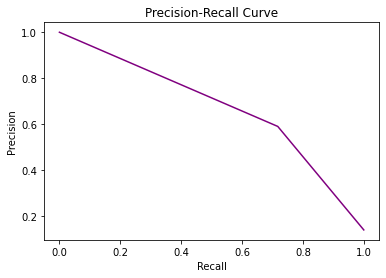

In [116]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_ADA)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

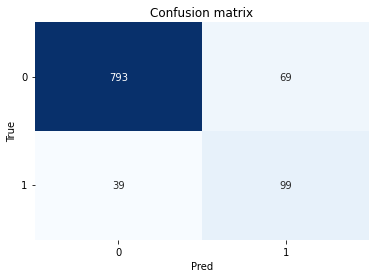

In [78]:
from sklearn import metrics
classes = np.unique(y_test)
cm0 = metrics.confusion_matrix(y_test, y_pred_test_ADA)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [79]:
# finding mean square error
from sklearn.metrics import mean_squared_error
MSE5=mean_squared_error(y_test,y_pred_test_ADA)
ADA_RMSE=np.sqrt(MSE5)
ADA_RMSE

0.3286335345030997

# 6. xgboost

In [80]:
from xgboost import XGBClassifier

In [81]:
XG= AdaBoostClassifier()
XG.fit(x_train_ns,y_train_ns)
y_pred_test_XG=XG.predict(x_test)
y_pred_train_XG=XG.predict(x_train_ns)

In [82]:
# accuracy score
accuracy_train_XG=accuracy_score(y_train_ns,y_pred_train_XG)*100
accuracy_test_XG= accuracy_score(y_test, y_pred_test_XG) * 100
print('Accuracy of Training data =',accuracy_train_XG)
print("Accuracy of Test data =", accuracy_test_XG)

Accuracy of Training data = 90.61032863849765
Accuracy of Test data = 89.1


In [83]:
print(classification_report(y_test, y_pred_test_XG))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       862
           1       0.59      0.72      0.64       138

    accuracy                           0.89      1000
   macro avg       0.77      0.82      0.79      1000
weighted avg       0.90      0.89      0.90      1000



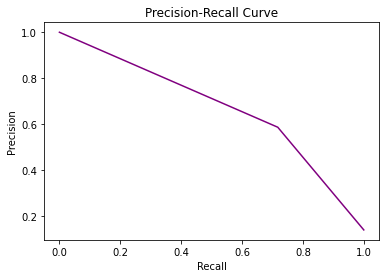

In [117]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_XG)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

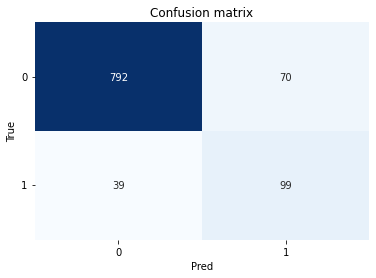

In [84]:
from sklearn import metrics
classes = np.unique(y_test)
cm0 = metrics.confusion_matrix(y_test, y_pred_test_XG)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [85]:
# finding mean square error
from sklearn.metrics import mean_squared_error
MSE6=mean_squared_error(y_test,y_pred_test_XG)
XG_RMSE=np.sqrt(MSE6)
XG_RMSE

0.3301514803843836

# 7. Bagging 

In [86]:
from sklearn.ensemble import BaggingClassifier
bgc=BaggingClassifier()

bgc.fit(x_train_ns,y_train_ns)
y_pred_test_bgc=bgc.predict(x_test)
y_pred_train_bgc=bgc.predict(x_train_ns)

In [87]:
# accuracy score
accuracy_train_bgc=accuracy_score(y_train_ns,y_pred_train_bgc)*100
accuracy_test_bgc= accuracy_score(y_test, y_pred_test_bgc) * 100
print('Accuracy of Training data =',accuracy_train_bgc)
print("Accuracy of Test data =", accuracy_test_bgc)

Accuracy of Training data = 99.83232729711602
Accuracy of Test data = 96.8


In [88]:
print(classification_report(y_test, y_pred_test_bgc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       862
           1       0.91      0.85      0.88       138

    accuracy                           0.97      1000
   macro avg       0.94      0.92      0.93      1000
weighted avg       0.97      0.97      0.97      1000



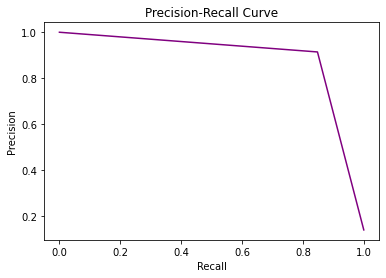

In [118]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_bgc)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

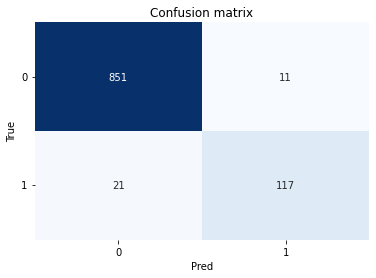

In [89]:
from sklearn import metrics
classes = np.unique(y_test)
cm0 = metrics.confusion_matrix(y_test, y_pred_test_bgc)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [90]:
# finding mean square error
from sklearn.metrics import mean_squared_error
MSE7=mean_squared_error(y_test,y_pred_test_bgc)
bgc_RMSE=np.sqrt(MSE7)
bgc_RMSE

0.17888543819998318

# 8. Boosting

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
boc = GradientBoostingClassifier()

boc.fit(x_train_ns,y_train_ns)
y_pred_test_boc=boc.predict(x_test)
y_pred_train_boc=boc.predict(x_train_ns)

In [92]:
# accuracy score
accuracy_train_boc=accuracy_score(y_train_ns,y_pred_train_boc)*100
accuracy_test_boc= accuracy_score(y_test, y_pred_test_boc) * 100
print('Accuracy of Training data =',accuracy_train_boc)
print("Accuracy of Test data =", accuracy_test_boc)

Accuracy of Training data = 97.08249496981891
Accuracy of Test data = 97.39999999999999


In [93]:
print(classification_report(y_test, y_pred_test_boc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       862
           1       0.96      0.85      0.90       138

    accuracy                           0.97      1000
   macro avg       0.97      0.92      0.94      1000
weighted avg       0.97      0.97      0.97      1000



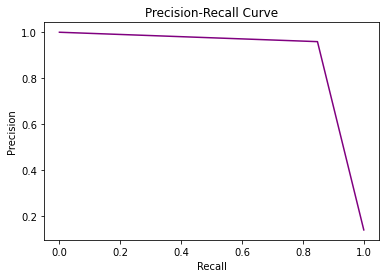

In [119]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_boc)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

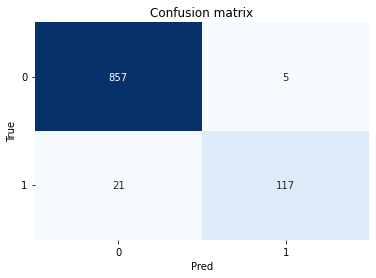

In [94]:
from sklearn import metrics
classes = np.unique(y_test)
cm0 = metrics.confusion_matrix(y_test, y_pred_test_boc)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [95]:
# finding mean square error
from sklearn.metrics import mean_squared_error
MSE8=mean_squared_error(y_test,y_pred_test_boc)
boc_RMSE=np.sqrt(MSE8)
boc_RMSE

0.161245154965971

# 9. KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier()
knn.fit(x_train_ns,y_train_ns)

y_pred_test_knn=knn.predict(x_test)
y_pred_train_knn=knn.predict(x_train_ns)

In [97]:
# accuracy score
accuracy_train_knn=accuracy_score(y_train_ns,y_pred_train_knn)*100
accuracy_test_knn= accuracy_score(y_test, y_pred_test_knn) * 100
print('Accuracy of Training data =',accuracy_train_knn)
print("Accuracy of Test data =", accuracy_test_knn)

Accuracy of Training data = 92.85714285714286
Accuracy of Test data = 84.7


In [98]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       862
           1       0.46      0.69      0.55       138

    accuracy                           0.85      1000
   macro avg       0.70      0.78      0.73      1000
weighted avg       0.88      0.85      0.86      1000



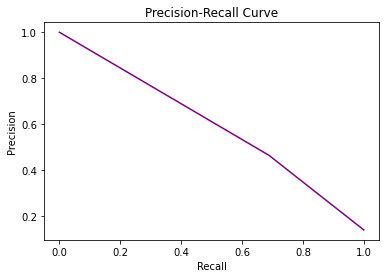

In [120]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_knn)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

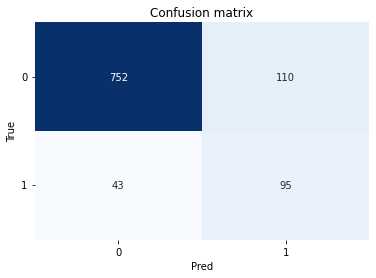

In [99]:
from sklearn import metrics
classes = np.unique(y_test)
cm0 = metrics.confusion_matrix(y_test, y_pred_test_knn)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [100]:
# finding mean square error
from sklearn.metrics import mean_squared_error
MSE9=mean_squared_error(y_test,y_pred_test_knn)
knn_RMSE=np.sqrt(MSE9)
knn_RMSE

0.39115214431215894

# 10. Neural Network

In [101]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()
nn.fit(x_train_ns,y_train_ns)

y_pred_test_nn=nn.predict(x_test)
y_pred_train_nn=nn.predict(x_train_ns)

C:\Users\onkar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [102]:
# accuracy score
accuracy_train_nn=accuracy_score(y_train_ns,y_pred_train_nn)*100
accuracy_test_nn= accuracy_score(y_test, y_pred_test_nn) * 100
print('Accuracy of Training data =',accuracy_train_nn)
print("Accuracy of Test data =", accuracy_test_nn)

Accuracy of Training data = 96.34473507712944
Accuracy of Test data = 91.5


In [103]:
print(classification_report(y_test, y_pred_test_nn))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       862
           1       0.69      0.70      0.70       138

    accuracy                           0.92      1000
   macro avg       0.82      0.83      0.82      1000
weighted avg       0.92      0.92      0.92      1000



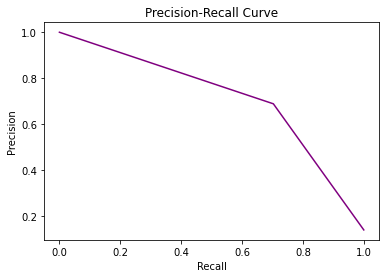

In [121]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_nn)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

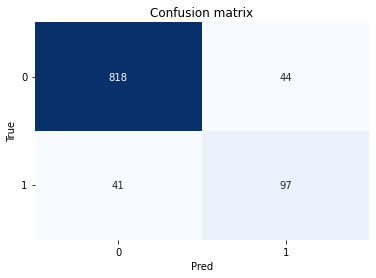

In [104]:
from sklearn import metrics
classes = np.unique(y_test)
cm0 = metrics.confusion_matrix(y_test, y_pred_test_nn)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [105]:
# finding mean square error
from sklearn.metrics import mean_squared_error
MSE10=mean_squared_error(y_test,y_pred_test_nn)
nn_RMSE=np.sqrt(MSE10)
nn_RMSE

0.29154759474226505

In [106]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

#xgboost
from xgboost import XGBClassifier
models['Xgboost']=XGBClassifier()

#adaboost
from sklearn.ensemble import AdaBoostClassifier
models['Adaboost']=AdaBoostClassifier()

#bagging
from sklearn.ensemble import BaggingClassifier
models['Bagging']=BaggingClassifier()

#boosting
from sklearn.ensemble import GradientBoostingClassifier
models['Boosting'] = GradientBoostingClassifier()

#knn
from sklearn.neighbors import KNeighborsClassifier
models['KNN'] =KNeighborsClassifier()

#Neural network
from sklearn.neural_network import MLPClassifier
models['Neural Network'] = MLPClassifier()

In [107]:
from sklearn.metrics import accuracy_score, precision_score,recall_score

accuracy, precision, recall  = {}, {}, {}  

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(x_train_ns,y_train_ns)# .fit on balanced datset (we have done by using over-sampling)
    
    # Make predictions on test dataset
    predictions = models[key].predict(x_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

C:\Users\onkar\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\onkar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\onkar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [108]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.814,0.456522,0.362069
Support Vector Machines,0.812,0.442029,0.354651
Decision Trees,0.948,0.847826,0.790541
Random Forest,0.974,0.847826,0.959016
Xgboost,0.973,0.847826,0.951220
Adaboost,0.892,0.717391,0.589286
Bagging,0.967,0.847826,0.906977
Boosting,0.974,0.847826,0.959016
KNN,0.847,0.688406,0.463415
Neural Network,0.915,0.717391,0.682759


In [109]:
result =pd.DataFrame({
    'Models':['Random Forest','DT','Logistic','SVM','Adaboost','XGBoost','Bagging','Boosting','KNN', 'Neural Network'],
    'RMSE':[RF_RMSE,DS_RMSE,LR_RMSE,SVM_RMSE,ADA_RMSE,XG_RMSE,bgc_RMSE,boc_RMSE,knn_RMSE, nn_RMSE]
})
result

,Models,RMSE
0,Random Forest,0.158114
1,DT,0.219089
2,Logistic,0.431277
3,SVM,0.433590
4,Adaboost,0.328634
5,XGBoost,0.330151
6,Bagging,0.178885
7,Boosting,0.161245
8,KNN,0.391152
9,Neural Network,0.291548


C:\Users\onkar\AppData\Local\Temp/ipykernel_39924/3306136383.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


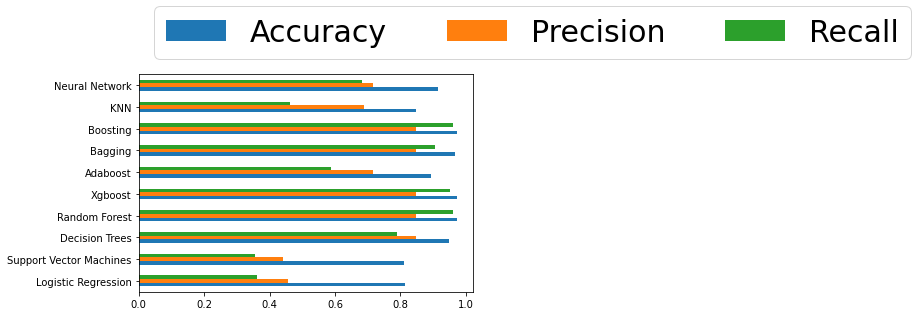

In [110]:

ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 30}
)
plt.tight_layout()

In [1]:
#import pickle
#from pickle import load
#from pickle import dump

In [2]:
#pickle_out=open('RF.pkl','wb')
#pickle.dump(RF,pickle_out)
#pickle_out.close()